<a href="https://colab.research.google.com/github/GerardoMunoz/PresentacionesAlgebraLineal/blob/main/Clase15_Repr5_2_TransfLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt

def grafo(nodos,arcos,etiquetas=[]):
    fig, ax = plt.subplots()
    for nodo in nodos:
        nodo=nodos[nodo]
        ax.scatter(nodo[0],-nodo[1],s=20,color='k')
        ax.text(nodo[0],-nodo[1],'$'+nodo[2]+'$',fontsize=15) 
    ax.axis('off')
    for nombre,nodo1,nodo2 in arcos:
        nodo1=nodos[nodo1]
        nodo2=nodos[nodo2]
        ax.arrow(float(nodo1[0]),-float(nodo1[1]),-float(nodo1[0])+float(nodo2[0]),float(nodo1[1])-float(nodo2[1]),head_width=0.05,head_length=0.05, length_includes_head=True)
        ax.text((nodo1[0]+nodo2[0])/2.0,-(nodo1[1]+nodo2[1])/2.0,'$'+nombre+'$',fontsize=18) 
    for x,y,texto in etiquetas:
        ax.text(x,-y,'$'+texto+'$',fontsize=15) 

# Transformaciones lineales
Sabemos que una transformación lineal entre espacios vectoriales $T:U \rightarrow V$ cumple: 
* (AT) $T(u_1 + u_2)=T(u_1) + T(u_2)$
* (MT) $T(c_1u_1)=c_1T(u_1)$

para todo $u_1,u_2 \in U$ y para todo $c_1, c_2 \in \mathbb{R}$

(AT) y (MT) equivalen a la siguiente igualdad 

* $T(c_1u_1 + c_2u_2)=c_1T(u_1) + c_2T(u_2)$

Utilizando inducción matemática se puede mostrar la equivalencia de (AT) y (MT) con la siguiente igualdad 

* $T(c_1u_1 + c_2u_2 + \cdots + c_nu_n)=c_1T(u_1) + c_2T(u_2) + \cdots + c_nT(u_n)$

para todo $u_1,u_2, \ldots , u_n \in U$ y para todo $c_1, c_2, \ldots, c_n \in \mathbb{R}$

Esto permite concluir que la transformación de una combinación lineal de vectores es la misma combinación lineal de las transformaciones de los vectores.

Si $B=[v_1, v_2, \ldots, v_n]$ es una sucesión de vectores de $U$  entonces $T^*(B)$ va a denotar la sucesión  de vectores dada por:

 $T^*(B)=[T(v_1), T(v_2), \ldots, T(v_n)]$

De manera análoga se puede aplicar si $B$ es un conjunto de vectores de $U$. 





# Teorema
$T:\mathbb{R}^n \rightarrow \mathbb{R}^m$ es una transformación lineal **si y sólo si** para todo $v \in \mathbb{R}^n$ se cumple que $T(v)=Av$. Donde $A$ es la matriz de $m \times n$  dada por 
 $$A=T^*(I)= \begin{bmatrix}
  T \left( \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} \right) & 
  T \left( \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix} \right) &
  \cdots &
  T \left( \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix} \right) 
 \end{bmatrix} $$ 
 

# Ejemplos
De las siguietes transformaciones de $\mathbb{R}^n$ en  $\mathbb{R}^m$ determine cuales son lineales y cuales no lo son. Para las transformaciones lineales encuentre la respectiva matriz de la transformación.
* (a) $T_1 \left( \begin{bmatrix} x_0 \\ x_1  \end{bmatrix} \right)= \left( \begin{bmatrix} 2x_0+ 3x_1 \\ 5x_0- 4x_1 \\ 6x_0 +2x_1 \end{bmatrix} \right)$
* (b) $T_2 \left( \begin{bmatrix} x_0 \\ x_1\\ x_2 \end{bmatrix} \right)= \left( \begin{bmatrix} 4x_0 - x_2 \\ 5x_1- 4  \end{bmatrix} \right)$
* (c) $T_3 \left( \begin{bmatrix} x_0 \\ x_1\end{bmatrix} \right)= \left( \begin{bmatrix} x_0x_1 \\ x_0- x_1 \end{bmatrix} \right)$

Solución:


In [22]:
import sympy as sp
x0, x1, x2 = sp.symbols('x_0 x_1 x_2')
u=sp.Matrix((x0,x1))  # un vector en $R^2$
v=sp.Matrix((x0,x1,x2)) # un vector en $R^3$

I2=sp.eye(2)
I2

Matrix([
[1, 0],
[0, 1]])

In [23]:
I3=sp.eye(3)
I3

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [24]:
# Ejemplo 1
def T1(u):
    (x0,x1) = u
    return sp.Matrix((2*x0+ 3*x1, 
                      5*x0 - 4*x1, 
                      6*x0 +2*x1))

A1=T1(I2[:,0]).row_join(T1(I2[:,1]))
A1

Matrix([
[2,  3],
[5, -4],
[6,  2]])

In [25]:
A1*u

Matrix([
[2*x_0 + 3*x_1],
[5*x_0 - 4*x_1],
[6*x_0 + 2*x_1]])

In [26]:
T1(u)

Matrix([
[2*x_0 + 3*x_1],
[5*x_0 - 4*x_1],
[6*x_0 + 2*x_1]])

In [27]:
T1(u) == A1*u

True

In [28]:
respuesta_ejemplo_a='Sí es una transformación lineal'

In [29]:
# Ejemplo 2
def T2(v):
    (x0,x1,x2) = v
    return sp.Matrix(( 4*x0 - x2, 
                      5*x1- 4 ))

A2=T2(I3[:,0]).row_join(T2(I3[:,1])).row_join(T2(I3[:,2]))
A2

Matrix([
[ 4, 0, -1],
[-4, 1, -4]])

In [30]:
A2*v

Matrix([
[         4*x_0 - x_2],
[-4*x_0 + x_1 - 4*x_2]])

In [31]:
T2(v)

Matrix([
[4*x_0 - x_2],
[  5*x_1 - 4]])

In [32]:
T2(v) == A2*v

False

In [33]:
respuesta_ejemplo_b='No es una transformación lineal'

In [34]:
# Ejemplo 3
def T3(u):
    (x0,x1) = u
    return sp.Matrix((x0*x1, x0 - x1))

A3=T3(I2[:,0]).row_join(T3(I2[:,1]))
A3

Matrix([
[0,  0],
[1, -1]])

In [35]:
A3*u

Matrix([
[        0],
[x_0 - x_1]])

In [36]:
T3(u)

Matrix([
[  x_0*x_1],
[x_0 - x_1]])

In [37]:
T3(u) == A3*u

False

In [38]:
respuesta_ejemplo_c='No es una transformación lineal'

# Extrapolación de las definiciones de las trasformaciones matriciales  a las transformaciones lineales

En la sección de espacios vectoriales vimos que el espacio vectorial de los polinomios de grado $n$ o menor tienen dimensión $n+1$ y que el espacio de las matrices de $m \times n$ tienen dimensión $mn$. Sin embargo, el espacio vectorial de todos los polinomios no tenía dimensión finita, al igual que el espacio de las funciones de valor real.

En esta sección nos centraremos en los espacios vectoriales de dimensión finita, en particular en los espacios vectoriales de los polinomios de grado $n$ o menor. 

Una matriz asocia una sucesión de vectores $A=[v_1, v_2, \ldots, v_n]$ con una transformación $T_A$. Esta asociación no se pierde en las transformaciones lineales entre espacios vectoriales de dimensión finita y es una de las ideas fundamentales del álgebra lineal.

## Teorema
Sea $A=[v_1, v_2, \ldots, v_n]$ una sucesión de vectores del espacio vectorial $V$ y sea $T_A: \mathbb{R}^n \rightarrow V$ una transformación dada por la combinación lineal de los vectores de $A$.

$$T_A\begin{pmatrix}x_1\\x_2\\\vdots\\x_n\end{pmatrix}=x_1v_1+x_2v_2+\cdots+x_nv_n$$

* $A$ es LI **si y sólo si** $T_A$ es inyectiva.
* $\text{Gen}(A)=V$  **si y sólo si** $T_A$ es sobreyectiva.
* $A$ es una base de $V$ **si y sólo si** $T_A$ es un isomorfismo.

Por lo tanto, la base estándar $B$ del espacio vectorial $V$ (de dimensión $n$) inducirá el isomorfismo $S_V: \mathbb{R}^n \rightarrow V$ llamado  **isomorfismo estándar del espacio $V$**.


## Ejemplo

Como la base estándar del espacio vectorial de los polinomios de grado $n$ o menor es $E_{Pn}=[1,x,x^2, \ldots, x^n ]$ entonces el isomorfismo estándar  será una combinación lineal de los vectores de la base.
$$S_{Pn}\left( \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_n  \end{bmatrix} \right)=a_0(1) + a_1(x) + \cdots + a_n(x^n) $$

En particular, la base estándar de $P_3$ es $E_{P3}=[1,x,x^2,x^3]$ y su isomorfismo es 
$$S_{P3}\left( \begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ a_3  \end{bmatrix} \right)=a_0(1) + a_1(x) +a_2(x^2) + a_3(x^3) $$

Cada isomorfismo tiene una función inversa. En el caso de un isomorfismo de la forma $S_V: \mathbb{R}^n \rightarrow V$ su función inversa se llama coordenadas.

## Coordenadas
Si $B$ es una base de $V$ que induce el isomorfismo $S_B: \mathbb{R}^n \rightarrow V$ y $v \in V$. Entonces al vector $\vec{x} \in \mathbb{R}^n$ que cumple $$S_B(\vec{x})=v$$ se conoce como las **coordenadas** de $v$ en la base $B$ y se denota

$$[v]_B=\vec{x}$$


### Ejemplo usando la base estándar de de los polinomios de grado 3 o menor

$E_{P3}=[1,x,x^2,x^3]$ 

Debido a que $$S_{P3}\begin{bmatrix} 3 \\ 5 \\ 8 \\ -2  \end{bmatrix}=3 + 5x + 8x^2 - 2x^3$$ entonces 


$$[3 + 5x + 8x^2 - 2x^3]_{EP3}=\begin{bmatrix} 3 \\ 5 \\ 8 \\ -2  \end{bmatrix}$$



### Ejemplo usando la base estándar de de las matrices de $2 \times 2$
$E_{M2x2}=\left[\begin{bmatrix} 1 & 0 \\0 & 0 \end{bmatrix},\begin{bmatrix} 0 & 1 \\0 & 0 \end{bmatrix},\begin{bmatrix} 0 & 0 \\1 & 0 \end{bmatrix},\begin{bmatrix} 0 & 0 \\0 & 1 \end{bmatrix}\right] $

$S_{M2x2}\begin{pmatrix} 3 \\ 5 \\ 8 \\ -2  \end{pmatrix}=3\begin{bmatrix} 1 & 0 \\0 & 0 \end{bmatrix}+5\begin{bmatrix} 0 & 1 \\0 & 0 \end{bmatrix}+8\begin{bmatrix} 0 & 0 \\1 & 0 \end{bmatrix}-2\begin{bmatrix} 0 & 0 \\0 & 1 \end{bmatrix}=\begin{bmatrix} 3 & 5 \\8 & -2 \end{bmatrix}$

$$[\begin{bmatrix} 3 & 5 \\8 & -2 \end{bmatrix}]_{EM2x2}=\begin{bmatrix} 3 \\ 5 \\ 8 \\ -2  \end{bmatrix}$$


## Núcleo e imagen

Las definiciones de las transformaciones matriciales que se basan en combinaciones lineales pueden ser extrapoladas a las transformaciones lineales. En particular las definiciones de **Núcleo** e **Imagen**. La **Nulidad** y el **Rango** corresponden a las dimensiones de los subespacios del núcleo e imagen respectivamente.  Además, cumplen las mismas propiedades que se enuncian a continuación.


## Teorema
Sea $T: U \rightarrow V$ una transformación lineal entre los espacios vectoriales $U$ y $V$.

Las siguientes tres afirmaciones son equivalentes.
* $T$ es inyectiva
* $\text{Nu}(T)=\{\vec{0}\}$
* $\nu(T)=0$

Estas otras tres afirmaciones son equivalentes.
* $T$ es sobreyectiva
* $\text{Im}(T)=V$
* $\rho(T)=Dim(V)$


# Propiedades de los isomorfismos
Si además, la transformación lineal $T:U \rightarrow V$ es biyectiva (es decir, es un isomorfismo) entonces hay una correspondencia de elemento a elemento. Por lo tanto, cualquier propiedad derivada de las combinaciones lineales que se cumpla en un conjunto tendrá su correspondiente en el otro conjunto, lo cual fundamenta los siguientes dos teoremas.

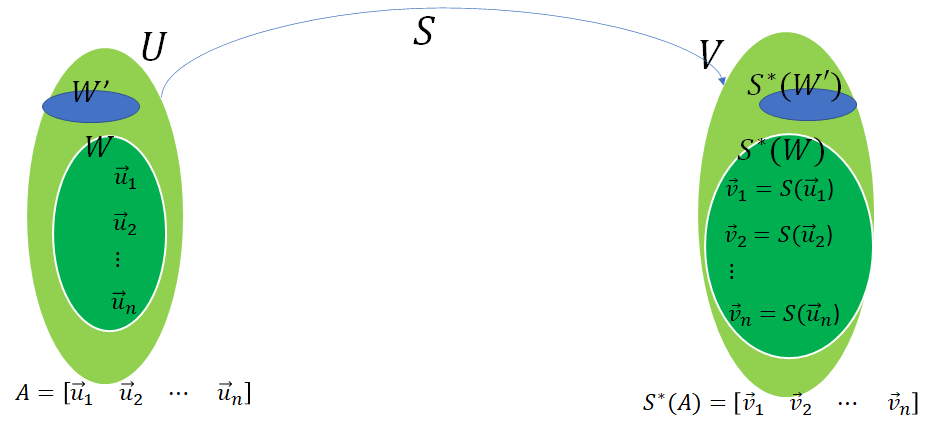

## Teorema
Sea el isomorfismos $S:U \rightarrow V$ entre los espacios vectoriales $U$ y $V$, sea $A=[\vec{u_1}, \vec{u_2}, \ldots, \vec{u_n}]$ una sucesión de vectores de $U$, y sean $W$ y $W'$ un subespacio y un subconjunto de $U$. 
entonces:
 
* $\text{Gen}(A)=U$ **si y sólo si** $\text{Gen}(S^*(A))=V$
* $A$ es LI **si y sólo si** $S^*(A)$ es LI
* $A$ es base de $U$ **si y sólo si** $S^*(A)$ es base de $V$
* $\text{Dim}(U)=\text{Dim}(V)$
* $W'$ es subespacio de $U$ **si y sólo si** $S^*(W')$ es subespacio de $V$
* $\text{Gen}(A)=W$ **si y sólo si** $\text{Gen}(S^*(A))=S^*(W)$
* $A$ es base de $W$ **si y sólo si** $S^*(A)$ es base de $S^*(W)$
* $\text{Dim}(W)=\text{Dim}(S^*(W))$

## Teorema 
Sean dos isomorfismos $S_1:A \rightarrow B$ y $S_2:C \rightarrow D$ en los espacios vectoriales $A, B, C, D$  

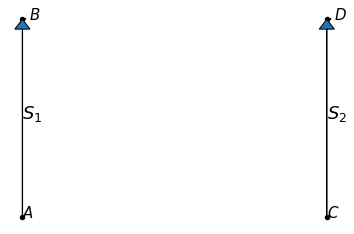

In [39]:
grafo({"V":(1,1,". B"),"W":(2,1,". D"),"V1":(1,2,"A"),"W1":(2,2,"C")},[("S_1","V1","V"),("S_2","W1","W")]
     )

y sean las transformaciones $T_1:A \rightarrow C$ y  $T_2:B \rightarrow D$ tales que
* $T_1 \circ S_1 = S_2 \circ T_2$

(esto se indica con un '=' entre los dos caminos).

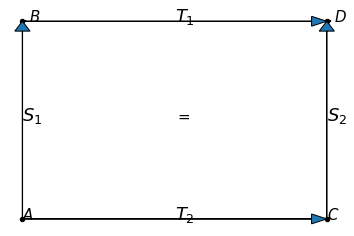

In [40]:
grafo({"V":(1,1,". B"),"W":(2,1,". D"),"V1":(1,2,"A"),"W1":(2,2,"C")},[("T_1","V","W"),("S_1","V1","V"),("S_2","W1","W"),("T_2","V1","W1")]
     ,[(1.5,1.5,"=")])

entonces:
* $T_1$ es una transformación lineal **si y sólo si** $T_2$ es una transformación lineal.
* $T_1$ es una transformación inyectiva **si y sólo si** $T_2$ es una transformación inyectiva.
* $T_1$ es una transformación sobreyectiva **si y sólo si** $T_2$ es una transformación sobreyectiva.
* $T_1$ es un isomorfismo **si y sólo si** $T_2$ es un isomorfismo.
* $\text{Im}(T_1)=S_2^*(\text{Im}(T_2))$
* $\text{Nu}(T_1)=S_1^*(\text{Nu}(T_2))$
* $\rho(T_1)=\rho(T_2)$
* $\nu(T_1)=\nu(T_2)$



# Ejemplo 1
Demuestre que $T \left( \begin{bmatrix} x \\ y \\ z \end{bmatrix} \right) = \begin{bmatrix} 3x - z \\ y  \end{bmatrix} $ es una transformación lineal y encuentre la respectiva matriz.

## Recorderis 
$T:\mathbb{R}^n \rightarrow \mathbb{R}^m$ es una transformación lineal **si y sólo si** para todo $v \in \mathbb{R}^n$ se cumple que $T(v)=Av$. Donde $A$ es la matriz de $m \times n$  dada por 
 $$A=T^*(I)= \begin{bmatrix}
  T \left( \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} \right) & 
  T \left( \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix} \right) &
  \cdots &
  T \left( \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix} \right) 
 \end{bmatrix} $$ 

## Solución
Primero encontraremos la matriz $A=T^*(I)$ y luego comprobaremos que $A\begin{bmatrix} x \\ y \\ z \end{bmatrix}=T \left( \begin{bmatrix} x \\ y \\ z \end{bmatrix} \right) = \begin{bmatrix} 3x - z \\ y  \end{bmatrix} $

\begin{align}
A &=T^*\left(\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}\right)\\
  &=\begin{bmatrix}
  T \left( \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} \right) & 
  T \left( \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} \right) &
  T \left( \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \right) 
 \end{bmatrix}\\
 &=\begin{bmatrix}
 3 & 0 & -1 \\ 
 0 & 1 &  0
 \end{bmatrix}
\end{align}

Ahora probamos que $A\begin{bmatrix} x \\ y \\ z \end{bmatrix}=T \left( \begin{bmatrix} x \\ y \\ z \end{bmatrix} \right) = \begin{bmatrix} 3x - z \\ y  \end{bmatrix} $

$A\begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix}
 3 & 0 & -1 \\ 
 0 & 1 &  0
 \end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
=\begin{bmatrix} 3x - z \\ y  \end{bmatrix} $

Lo cual prueba que $T$ si es lineal.




# Ejemplo 2
Demuestre que $T:P_1 \rightarrow P_3$ dada por 
$$T(a_0 + a_1 x )= 3a_0 + (2a_0 + a_1)x + (a_0 + 2a_1)x^2 + 3a_1x^3 $$
es una transformación lineal y encuentre la matriz usando las respectivas bases estándar.

## Recorderis 1
$B=\begin{bmatrix} v_0 & v_1 & \cdots & v_{n-1} \end{bmatrix}$ es una base del espacio vectorial $V$ de dimensión $n$ **si y sólo si** la transformación asociada 
$S_B:\mathbb{R}^n \rightarrow V$ dada por 
$$S_B\left( \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_{(n-1)} \end{bmatrix} \right)=a_0 v_0 +a_1 v_1 + \cdots +a_{(n-1)} v_{(n-1)} $$
es un isomorfismo.

## Recorderis 2
### La base estándar de $P_1$ 
$E_{P1}=[1,x]$ y su isomorfismo es 
$$S_{P1}\left( \begin{bmatrix} a_0 \\ a_1  \end{bmatrix} \right)=a_0(1) + a_1(x) $$


#### Ejemplo


$$S_{P1}\left( \begin{bmatrix} 8 \\ 4  \end{bmatrix} \right)=8 + 4x
 $$

$$T(8 + 4 x )= 3*8 + (2*8 + 4)x + (8 + 2*4)x^2 + 3*4x^3 = 24 + 20x + 16 x^2 + 15x^3
$$

$[24 + 20x + 16 x^2 + 15x^3]_{EP3}=\begin{pmatrix} 24 \\ 20 \\ 16 \\ 15  \end{pmatrix}$


### La base estándar de $P_3$ 
 $E_{P3}=[1,x,x^2,x^3]$ y su isomorfismo es 
$$S_{P3}\left( \begin{bmatrix} a_0 \\ a_1 \\ a_2 \\ a_3  \end{bmatrix} \right)=a_0(1) + a_1(x) +a_2(x^2) + a_3(x^3) $$


#### Ejemplo 
$$S_{P3}\left( \begin{bmatrix} 4 \\ 1 \\ -1 \\ 3  \end{bmatrix} \right)= 4 + 1x + (-1)x^2  + 3x^3 
 $$

$[4+x-x^2+3x^3]_{EP3}=\begin{pmatrix} 4 \\ 1 \\ -1 \\ 3  \end{pmatrix}$



## Recorderis 3

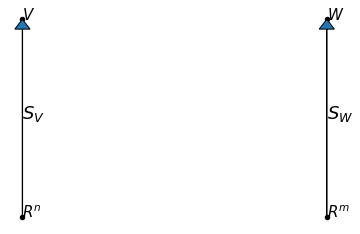

In [41]:
grafo({"V":(1,1,"V"),"W":(2,1,"W"),"V1":(1,2,"R^n"),"W1":(2,2,"R^m")},[("S_V","V1","V"),("S_W","W1","W")]
     )

Sean $V$ y $W$ espacios vectoriales, sean $n$ y $m$ sus respectivas dimensiones, sean $B_V$ y $B_W$ bases de cada espacio y sean $S_V:\mathbb{R}^n \rightarrow V$ y $S_W:\mathbb{R}^m \rightarrow W$ sus respectivos isomorfismos.

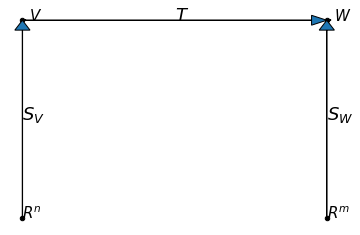

In [42]:
grafo({"V":(1,1,". V"),"W":(2,1,". W"),"V1":(1,2,"R^n"),"W1":(2,2,"R^m")},[("T","V","W"),("S_V","V1","V"),("S_W","W1","W")]
     )

$T:V \rightarrow W$ es una transformación lineal **si y sólo si** para todo $v \in V$ se cumple que $S_W^{-1} \circ T \circ S_V(v)=Av$. Donde $A$ es la matriz de $m \times n$  dada por 
 $$A=S_W^{*-1} \circ T^* \circ S_V^*(I)$$

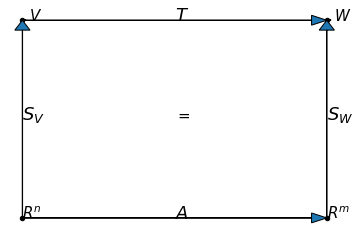

In [43]:
grafo({"V":(1,1,". V"),"W":(2,1,". W"),"V1":(1,2,"R^n"),"W1":(2,2,"R^m")},[("T","V","W"),("S_V","V1","V"),("S_W","W1","W"),("A","V1","W1")]
     ,[(1.5,1.5,"=")])

## Solución
Recordemos que 
$$T(a_0 + a_1 x )= 3a_0 + (2a_0 + a_1)x + (a_0 + 2a_1)x^2 + 3a_1x^3 $$

Primero encontraremos la matriz $A=S_{P3}^{*-1} \circ T^* \circ S_{P1}^*(I)$ y luego comprobaremos que $A\begin{bmatrix} a_0 \\ a_1  \end{bmatrix}=S_{P3}^{-1} \circ T \circ S_{P1} \left( \begin{bmatrix} a_0 \\ a_1  \end{bmatrix} \right)  $

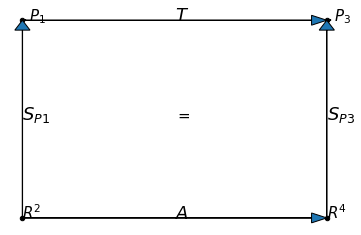

In [44]:
grafo({"V":(1,1,". P_1"),"W":(2,1,". P_3"),"V1":(1,2,"R^2"),"W1":(2,2,"R^4")},
      [("T","V","W"),("S_{P1}","V1","V"),("S_{P3}","W1","W"),("A","V1","W1")]
     ,[(1.5,1.5,"=")])

\begin{align}
A &=S_{P3}^{*-1} \circ T^* \circ S_{P1}^* \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right)\\
  &=S_{P3}^{*-1} \circ T^*\left(\begin{bmatrix}
  S_{P1} \left( \begin{bmatrix} 1 \\ 0  \end{bmatrix} \right) & 
  S_{P1} \left( \begin{bmatrix} 0 \\ 1 \end{bmatrix} \right)  
 \end{bmatrix}\right)\\
  &=S_{P3}^{*-1} \circ T^*\left([
   1 + 0x,  
   0 + 1x   
 ]\right)\\
  &=S_{P3}^{*-1}\left([
   T(1 + 0x),  
   T(0 + 1x)   
 ]\right)\\
  &=S_{P3}^{*-1}\left([
   3 + 2x + 1x^2 + 0x^3,  
   0 + 1x + 2x^2 + 3x^3   
 ]\right)\\
  &=[
   S_{P3}^{-1}(3 + 2x + 1x^2 + 0x^3),  
   S_{P3}^{-1}(0 + 1x + 2x^2 + 3x^3)   
 ]\\
 &=\begin{bmatrix}
 3 & 0 \\ 
 2 & 1 \\ 
 1 & 2 \\
 0 & 3 
 \end{bmatrix}
\end{align}

Ahora probamos que $A\begin{bmatrix} a_0 \\ a_1  \end{bmatrix}=S_{P3}^{-1} \circ T \circ S_{P1} \left( \begin{bmatrix} a_0 \\ a_1  \end{bmatrix} \right)$

\begin{align}
A\begin{bmatrix} a_0 \\ a_1 \end{bmatrix}
 &\stackrel{?}{=}S_{P3}^{-1} \circ T \circ S_{P1} \left(\begin{bmatrix} a_0 \\ a_1 \end{bmatrix}\right)\\
\begin{bmatrix}
 3 & 0 \\ 
 2 & 1 \\ 
 1 & 2 \\
 0 & 3 
 \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} 
  &\stackrel{?}{=}S_{P3}^{-1} \circ T\left(
   a_0 + a_1 x
 \right)\\
\begin{bmatrix}
 3a_0 \\ 
 2a_0 + a_1 \\ 
 1a_0 + 2a_1 \\
        3a_1 
 \end{bmatrix}  &=S_{P3}^{-1}\left(
   3a_0 + (2a_0 + a_1)x + (a_0 + 2a_1)x^2 + 3a_1x^3\right)\\
\end{align}

Lo cual prueba que $T$ es una transformación lineal.

## Ejemplo 2b
$$T(a_0 + a_1 x )= (a_0 +a_1) + (a_0 + a_1)x + (a_0 + a_1)x^2 $$



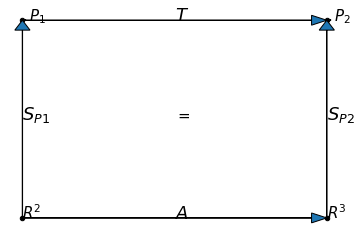

In [45]:
grafo({"V":(1,1,". P_1"),"W":(2,1,". P_2"),"V1":(1,2,"R^2"),"W1":(2,2,"R^3")},
      [("T","V","W"),("S_{P1}","V1","V"),("S_{P2}","W1","W"),("A","V1","W1")]
     ,[(1.5,1.5,"=")])

$A =S_{P3}^{*-1} \circ T^* \circ S_{P1}^* \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right)$

$A =S_{P3}^{*-1} \circ T^* \left(1,x\right)$

$A =S_{P3}^{*-1}  \left(1+x+x^2 ,1+x+x^2\right)$

$A=\begin{bmatrix}
 1 & 1 \\ 
 1 & 1 \\ 
 1 & 1 
  \end{bmatrix}$

Ahora verificamos. Por un lado se tiene lo siguiente.

$A \begin{pmatrix} a_0  \\ a_1 \end{pmatrix} = \begin{bmatrix}
 1 & 1 \\ 
 1 & 1 \\ 
 1 & 1 
  \end{bmatrix}\begin{pmatrix} a_0  \\ a_1 \end{pmatrix} 
  =\begin{bmatrix} a_0 + a_1  \\  a_0 + a_1 \\ a_0 + a_1 \end{bmatrix}$

  Por otro lado se obtiene lo siguiente.

  $S_{P3}^{-1} \circ T \circ S_{P1} \left(\begin{matrix} a_0  \\ a_1 \end{matrix}\right)= S_{P3}^{-1} \circ T\left(\begin{bmatrix} a_0 +   a_1x \end{bmatrix}\right)=S_{P3}^{-1}((a_0 +a_1) + (a_0 + a_1)x + (a_0 + a_1)x^2)=\begin{bmatrix} a_0 + a_1  \\  a_0 + a_1 \\ a_0 + a_1 \end{bmatrix}$

Como ambos caminos son iguales, entonces la transformación sí es lineal

# Ejemplo 3
Para la transformación de ejercicio 2 

$$T(a_0 + a_1 x )= 3a_0 + (2a_0 + a_1)x + (a_0 + 2a_1)x^2 + 3a_1x^3 $$

encuentre una base para el núcleo, una base para la imagen, la nulidad, el rango y diga si es inyectiva, sobreyectiva o es un isomorfismo.

## Recorderis 



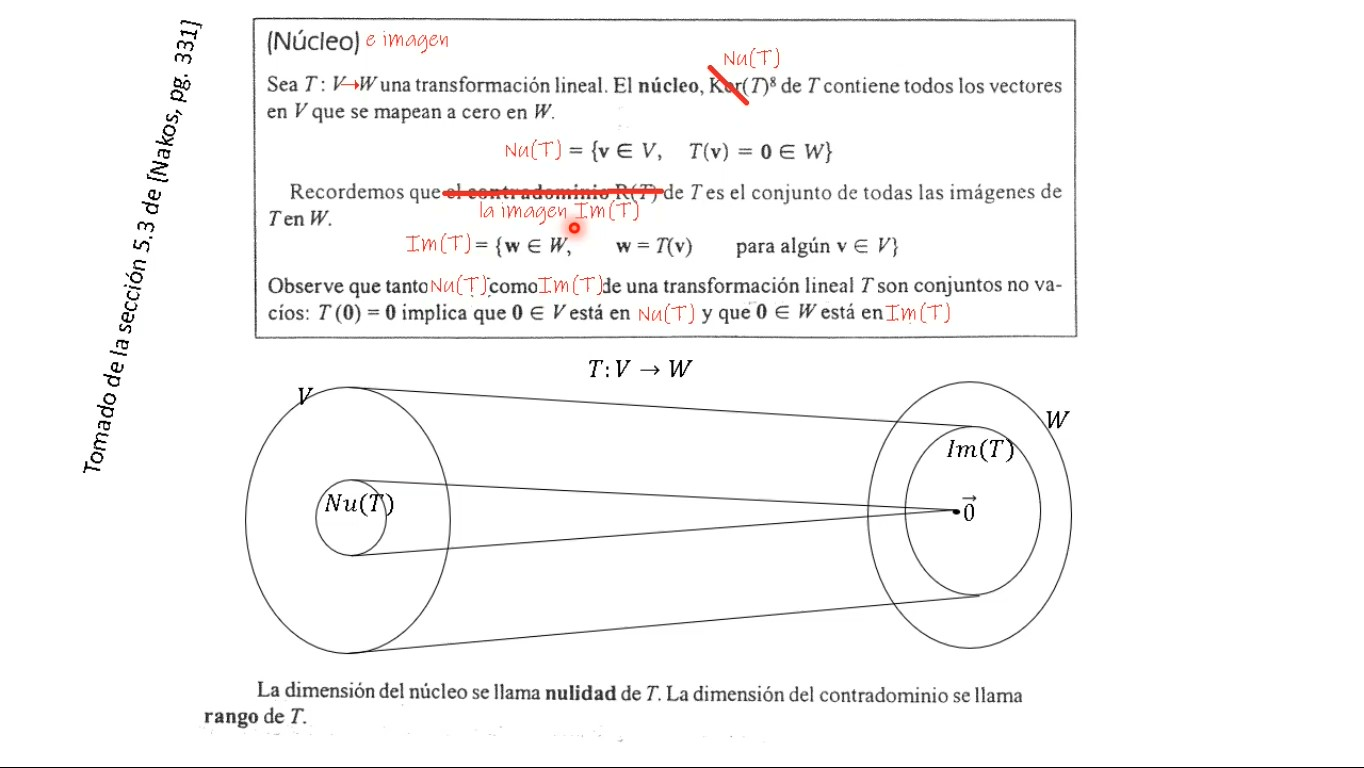



Usando la notación del Ejercicio 2.

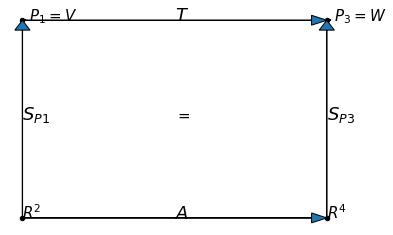

In [46]:
grafo({"V":(1,1,". P_1=V"),"W":(2,1,". P_3=W"),"V1":(1,2,"R^2"),"W1":(2,2,"R^4")},
      [("T","V","W"),("S_{P1}","V1","V"),("S_{P3}","W1","W"),("A","V1","W1")]
     ,[(1.5,1.5,"=")])



* $B_N$ es base del núcleo de $A$ **si y sólo si** $S_V^*(B_N)$ es base del núcleo de $V$ 
* $B_I$ es base de la imagen de $A$ **si y sólo si** $S_W^*(B_I)$ es base de la imagen de $W$ 

## Solución
Primero encontraremos el núcleo de $A$, que es la solución del sistema homogéneo [A:0] 

$\begin{bmatrix}
 3 & 0 & : & 0\\ 
 2 & 1 & : & 0\\ 
 1 & 2 & : & 0\\
 0 & 3 & : & 0
 \end{bmatrix} \sim
\begin{bmatrix}
 3 & 0 & : & 0\\ 
 0 & 1 & : & 0\\ 
 0 & 2 & : & 0\\
 0 & 3 & : & 0
 \end{bmatrix} \sim
\begin{bmatrix}
 3 & 0 & : & 0\\ 
 0 & 1 & : & 0\\ 
 0 & 0 & : & 0\\
 0 & 0 & : & 0
 \end{bmatrix} $

Cómo el sistema de ecuaciones no tiene variables libres entonces la solución del sistema homogéneo es el vector cero y su base es el conjunto vació. Por lo tanto, la base del núcleo de $A$ es el conjunto vació. Lo cual implica que la base del núcleo de $T$ es también el conjunto vacío.

Como cada columna de $A$ tiene un l-pivote entonces las columnas de $A$ son la base de la imagen de $A$  
Por lo tanto, la base de la imagen de $T$ es  

$$ S^*_V\left(
\begin{bmatrix}
 3 & 0 \\ 
 2 & 1 \\ 
 1 & 2 \\
 0 & 3
 \end{bmatrix}\right)=
\left[
S_V\left(\begin{bmatrix}
 3\\ 
 2\\ 
 1\\
 0
 \end{bmatrix} 
 \right),
 S_V\left(\begin{bmatrix}
 0\\ 
 1\\ 
 2\\
 3
 \end{bmatrix} 
 \right) \right]=
 [3+2x+x^2,x+2x^2+3x^3]
 $$
 





In [47]:
nulidad_ejemplo_3=0

In [48]:
rango_ejemplo_3=2

In [49]:
inyectiva_ejemplo_3='Sí'

In [50]:
sobreyectiva_ejemplo_3='No'

In [51]:
isomorfismo_ejemplo_3='No'

# Ejemplo 3b


$$T(a_0 + a_1 x )= (a_0 +a_1) + (a_0 + a_1)x + (a_0 + a_1)x^2 + (a_0+a_1)x^3 $$

La matriz de la transformación es

$A=\begin{bmatrix}
 1 & 1 \\ 
 1 & 1 \\ 
 1 & 1 
  \end{bmatrix}$

El núcleo de la matriz se encuentra solucionando el sistema homogéneo

$[A:\vec{0}]=\begin{bmatrix}
 1 & 1 & : & 0\\ 
 1 & 1 & : & 0\\ 
 1 & 1 & : & 0
  \end{bmatrix}\sim\begin{bmatrix}
 1 & 1 & : & 0\\ 
 0 & 0 & : & 0\\ 
 0 & 0 & : & 0
  \end{bmatrix}$

En este caso hay una variable libre y le asignamos un parámetro $x_2=t_1$

Ahora se plantea la primera ecuación y se despeja la variable delantera

$x_1 +x_2 =0  \Rightarrow x_1 =-t_1$

La solución general queda

$\begin{pmatrix}
x_1 \\ x_2
  \end{pmatrix}= t_1\begin{pmatrix}
-1 \\1
  \end{pmatrix}$

  Una base del núcleo de $A$ es 

$\left\{ \begin{pmatrix}
-1 \\1
  \end{pmatrix} \right\}$





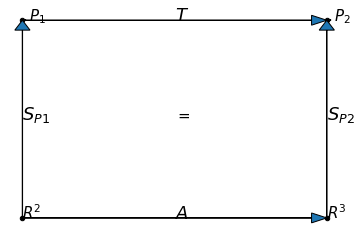

In [52]:
grafo({"V":(1,1,". P_1"),"W":(2,1,". P_2"),"V1":(1,2,"R^2"),"W1":(2,2,"R^3")},
      [("T","V","W"),("S_{P1}","V1","V"),("S_{P2}","W1","W"),("A","V1","W1")]
     ,[(1.5,1.5,"=")])

Una base del núcleo de $T$ es


$S_{P1}^*\left\{ \begin{pmatrix}
-1 \\1
  \end{pmatrix} \right\}=\left\{ S_{P1}\begin{pmatrix}
-1 \\1
  \end{pmatrix} \right\}=\left\{ -1 +1x \right\}$

Una base de la imagen de $A$ se encuentra eliminando las columnas sin l-pivote.

$A=\begin{bmatrix}
 1 & 1 \\ 
 1 & 1 \\ 
 1 & 1 
  \end{bmatrix}\sim\begin{bmatrix}
 1 & 1 \\ 
 0 & 0 \\ 
 0 & 0 
  \end{bmatrix}$

 Esta base está dada por 

 $\left\{ \begin{pmatrix}
1 \\1 \\1
  \end{pmatrix} \right\}$

Por lo tanto una base de la imagen de $T$ es


$S_{P2}^*\left\{ \begin{pmatrix}
1 \\1 \\1
  \end{pmatrix} \right\}=\left\{ S_{P2}\begin{pmatrix}
1 \\1 \\1
  \end{pmatrix} \right\}=\left\{ 1 + 1x +1 x^2 \right\}$  
 

# Ejemplo 4
Sean $B_1=[1+x, 1-x]$ y $B_2=[1, 1+x]$ bases de $P_1$. Encuentre la matriz:
* $A_2$ para pasar de $B_2$ a $E_{P1}$
* $A'_2$ para pasar de $E_{P1}$ a $B_2$
* $A_1$ para pasar de $B_1$ a $E_{P1}$
* $A_5$ para pasar de $B_1$ a $B_2$

## Recorderis
Sea $V$ un espacio vectorial y sean $B_1$ y $B_2$ dos bases de $V$, con sus respectivos isomorfismos $S_{B1}:\mathbb{R}^n \rightarrow V$ y $S_{B2}:\mathbb{R}^n \rightarrow V$. 

La matriz de cambio de la base $B_1$ a la base $B_2$ está dada por
$A=S^{*-1}_{B2}S^*_{B1}(I)$.

De tal forma que si $v \in V$ entonces  $A[v]_{B1}=[v]_{B2}$. Donde $[v]_B=S^{-1}_{B}(v)$ corresponde a las coordenadas de $v$ en la base $B$. 

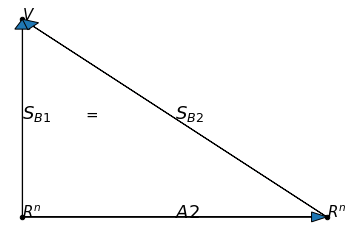

In [53]:
grafo({"V":(1,0,"V"),"V1":(1,1,"R^n"),"W1":(2,1,"R^n")},[("S_{B1}","V1","V"),("S_{B2}","W1","V"),("A2","V1","W1")]
     ,[(1.2,0.5,"=")])

## Solución
Recordemos que la base estándar de $P_1$ es $E_{P1}=[1+0x,0+1x]$ y que el isomorfismo estándar es $S_{P1}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=a_0(1)+a_1(x)$

La base $B_1=[1+x, 1-x]$ tiene asociado el isomorfismo $S_{B1}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=a_0(1+x)+a_1(1-x)$
$$S_{B1}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=(a_0+a_1)+(a_0-a_1)x$$

La base $B_2=[1, 1+x]$ tiene asociado el isomorfismo $S_{B2}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=a_0(1)+a_1(1+x)$
$$S_{B2}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=(a_0+a_1)+(a_1)x$$



$$S_{B2}\left(\begin{bmatrix}9\\5\end{bmatrix}\right)=(9+5)+(5)x=14+5x$$

$$S_{B1}\left(\begin{bmatrix}0\\4\end{bmatrix}\right)=(0+4)+(0-4)x=4-4x$$

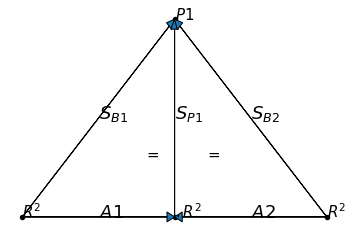

In [54]:
grafo({"V":(1,1,"P1"),"V0":(0,2,"R^2"),"V1":(1,2,". R^2"),"W1":(2,2,"R^2")},
      [("S_{B1}","V0","V"),("S_{P1}","V1","V"),("S_{B2}","W1","V"),("A2","W1","V1"),("A1","V0","V1")]
     ,[(0.8,1.7,"="),(1.2,1.7,"=")])

Sean $B_1=[1+x, 1-x]$ y $B_2=[1, 1+x]$ bases de $P_1$.

La matriz de $B_2$ a $E_{P1}$ es 
$$A_2=S^{*-1}_{P1}S^*_{B2}\left(\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\right)=S^{*-1}_{P1}([1,1+x])=\begin{bmatrix}1 & 1\\0 & 1\end{bmatrix}$$

$$(A_2)^{-1}=(S^{*-1}_{P1} \circ S^*_{B2})^{-1}\left(\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\right)=(S^{*-1}_{B2} \circ S^*_{P1})\left(\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\right)$$


La matriz de  $E_{P1}$ a $B_2$ es 
$$A'_2=(S^{*-1}_{B2} \circ S^*_{P1})\left(\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\right)
$$



La matriz de $E_{P1}$ a $B_{2}$ es la matriz inversa de la matriz de $B_2$ a $E_{P1}$ 
$$A_2^{-1}=\begin{bmatrix}1 & 1\\0 & 1\end{bmatrix}^{-1}=\frac{1}{1-0}\begin{bmatrix}1 & -1\\0 & 1\end{bmatrix}=\begin{bmatrix}1 & -1\\0 & 1\end{bmatrix}$$


La matriz de $B_1$ a $E_{P1}$ es 
$$A_1=S^{*-1}_{P1}S^*_{B1}\left(\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\right)=S^{*-1}_{P1}([1+x,1-x])=\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$$

La matriz de $B_1$ a $B_2$ es la multiplicación de las matrices de $B_1$ a $E_{P1}$ y de $E_{P1}$ a $B_2$
$$ A_5=A_2^{-1}A_1=\begin{bmatrix}1 & -1\\0 & 1\end{bmatrix}\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}=\begin{bmatrix}0 & 2\\1 & -1\end{bmatrix}$$

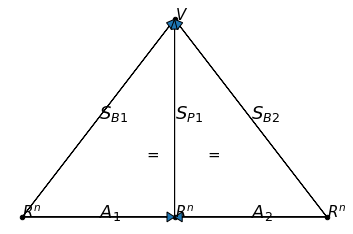

In [55]:
grafo({"V":(1,1," V"),"V0":(0,2,"R^n"),"V1":(1,2,"R^n"),"W1":(2,2,"R^n")},
      [("S_{B1}","V0","V"),("S_{P1}","V1","V"),("S_{B2}","W1","V"),("A_2","W1","V1"),("A_1","V0","V1")]
     ,[(0.8,1.7,"="),(1.2,1.7,"=")])

# Ejemplo 5
Para la transformación $T:P_1 \rightarrow P_3$ dada por 
$$T(a_0 + a_1 x )= 3a_0 + (2a_0 + a_1)x + (a_0 + 2a_1)x^2 + 3a_1x^3 $$
encuentre la matriz de la transformación $A4$ usando la base $B_1=[1+x, 1-x]$ para el dominio y la base $B_3=[1,1+x, x+x^2, x^2+x^3 ]$ para el codominio.  

## Solución

Recordemos que la base estándar de $P_1$ es $$E_{P1}=[1,x]$$ y que el isomorfismo estándar es $$S_{P1}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=a_0(1)+a_1(x)$$
Además, la base estándar de $P_3$ es $$E_{P3}=[1,x,x^2,x^3]$$ y que el isomorfismo estándar es $$S_{P3}\left(\begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix}\right)=a_0(1)+a_1(x)+a_2(x^2)+a_3(x^3)$$
La base $$B_1=[1+x, 1-x]$$ tiene asociado el isomorfismo $$S_{B1}\left(\begin{bmatrix}a_0\\a_1\end{bmatrix}\right)=a_0(1+x)+a_1(1-x)$$
La base $$B_3=[1,1+x, x+x^2, x^2+x^3 ]$$ tiene asociado el isomorfismo $$S_{B3}\left(\begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix}\right)=a_0(1)+a_1(1+x)+a_2(x+x^2)+a_3(x^2+x^3)$$


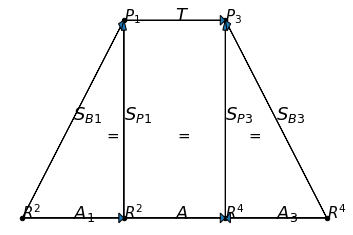

In [56]:
grafo({"P1":(1,1,"P_1"),"P3":(2,1,"P_3"),"B1":(0,2,"R^2"),"R2":(1,2,"R^2"),"R4":(2,2,"R^4"),"B3":(3,2,"R^4")},
      [("T","P1","P3"),("S_{B1}","B1","P1"),("S_{P1}","R2","P1"),("S_{P3}","R4","P3"),("S_{B3}","B3","P3"),("A_1","B1","R2"),
       ("A","R2","R4"),("A_3","B3","R4")],
      [(0.8,1.6,"="),(1.5,1.6,"="),(2.2,1.6,"=")])

La matriz $A_1$ coincide con la del ejercicio 4.

In [57]:
import sympy as sp
A1=sp.Matrix([
    [1, 1],
    [1, -1]
])
A1

Matrix([
[1,  1],
[1, -1]])

La matriz $A$ coincide con la del ejercicio 2. 

In [58]:
A=sp.Matrix([
 [3, 0], 
 [2, 1], 
 [1, 2],
 [0, 3] 
])
A

Matrix([
[3, 0],
[2, 1],
[1, 2],
[0, 3]])

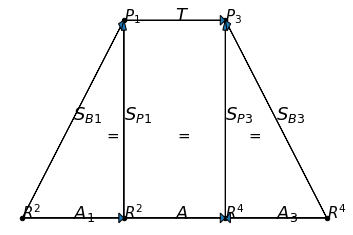

In [59]:
grafo({"P1":(1,1,"P_1"),"P3":(2,1,"P_3"),"B1":(0,2,"R^2"),"R2":(1,2,"R^2"),"R4":(2,2,"R^4"),"B3":(3,2,"R^4")},
      [("T","P1","P3"),("S_{B1}","B1","P1"),("S_{P1}","R2","P1"),("S_{P3}","R4","P3"),("S_{B3}","B3","P3"),("A_1","B1","R2"),
       ("A","R2","R4"),("A_3","B3","R4")],
      [(0.8,1.6,"="),(1.5,1.6,"="),(2.2,1.6,"=")])

Queda pendiente encontrar la matriz $A_3$.

La matriz de $B_3$ a $E_{P3}$ es 
$$\begin{align}
A_3&=S^{*-1}_{P3}S^*_{B3}\left(\begin{bmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{bmatrix}\right)\\
&=S^{*-1}_{E1}([1,1+x, x+x^2, x^2+x^3])\\
&=\begin{bmatrix}1 & 1 &0 &0\\0 & 1 &1&0\\0&0&1&1\\0&0&0&1\end{bmatrix}\\
\end{align}$$

La matriz solicitada ($A4$) corresponde al producto
$$A4=A_3^{-1}AA_1$$
Por lo tanto, vamos a encontrar $A_3^{-1}$  

In [60]:
A3=sp.Matrix([[1, 1, 0, 0],
             [0, 1, 1, 0],
             [0, 0, 1, 1],
             [0, 0, 0, 1]])
A3

Matrix([
[1, 1, 0, 0],
[0, 1, 1, 0],
[0, 0, 1, 1],
[0, 0, 0, 1]])

In [61]:
M=A3.row_join(sp.eye(4))
M

Matrix([
[1, 1, 0, 0, 1, 0, 0, 0],
[0, 1, 1, 0, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0, 1, 0],
[0, 0, 0, 1, 0, 0, 0, 1]])

In [62]:
M[2,:] -= M[3,:]
M

Matrix([
[1, 1, 0, 0, 1, 0, 0,  0],
[0, 1, 1, 0, 0, 1, 0,  0],
[0, 0, 1, 0, 0, 0, 1, -1],
[0, 0, 0, 1, 0, 0, 0,  1]])

In [63]:
M[1,:] -= M[2,:]
M

Matrix([
[1, 1, 0, 0, 1, 0,  0,  0],
[0, 1, 0, 0, 0, 1, -1,  1],
[0, 0, 1, 0, 0, 0,  1, -1],
[0, 0, 0, 1, 0, 0,  0,  1]])

In [64]:
M[0,:] -= M[1,:]
M

Matrix([
[1, 0, 0, 0, 1, -1,  1, -1],
[0, 1, 0, 0, 0,  1, -1,  1],
[0, 0, 1, 0, 0,  0,  1, -1],
[0, 0, 0, 1, 0,  0,  0,  1]])

In [65]:
A3_inv=M[:,4:]
A3_inv

Matrix([
[1, -1,  1, -1],
[0,  1, -1,  1],
[0,  0,  1, -1],
[0,  0,  0,  1]])

In [66]:
A3_inv*A3

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

La matriz de la transformación en las bases solicitadas es

In [67]:
A4=A3_inv*A*A1
A4

Matrix([
[0,  4],
[3, -1],
[0,  2],
[3, -3]])

## Verificación
Para verificar, vamos a mostrar que para cualquier $v=\left(\matrix{x_0\\x_1}\right)$ se cumple que
$T \circ S_{B1}(v) = S_{B2} \circ A4(v)$

In [68]:
x,v0,v1=sp.symbols('x v_0 v_1')

def sb1(v2):
    return v2[0]*(1+x) + v2[1]*(1-x)

def sb3(v4):
    return v4[0]*1+v4[1]*(1+x)+v4[2]*(x+x**2)+v4[3]*(x**2+x**3) 

def T(p):
    a_0=p.subs({x:0})
    a_1=p.subs({x:1})-a_0
    return 3*a_0 + (2*a_0 + a_1)*x + (a_0 + 2*a_1)*x**2 + 3*a_1*x**3

v=sp.Matrix([v0,
             v1])

v

Matrix([
[v_0],
[v_1]])

In [69]:
sb1(v)

v_0*(x + 1) + v_1*(1 - x)

In [70]:
 T(sb1(v)).expand()

3*v_0*x**3 + 3*v_0*x**2 + 3*v_0*x + 3*v_0 - 3*v_1*x**3 - v_1*x**2 + v_1*x + 3*v_1

In [71]:
A*v

Matrix([
[      3*v_0],
[2*v_0 + v_1],
[v_0 + 2*v_1],
[      3*v_1]])

In [72]:
sb3(A4*v).expand()

3*v_0*x**3 + 3*v_0*x**2 + 3*v_0*x + 3*v_0 - 3*v_1*x**3 - v_1*x**2 + v_1*x + 3*v_1

In [73]:
sb3(A4*v).expand() == T(sb1(v)).expand()

True

Lo cual prueba que sí son iguales ambos caminos.

In [74]:
A4_ejemplo_5=A4[:,:]
A4_ejemplo_5

Matrix([
[0,  4],
[3, -1],
[0,  2],
[3, -3]])

In [75]:
nombre=''

In [76]:
codigo=0

In [77]:
# Recuerde que a es el último dígito de código
# y que b es el penúltimo dígito


# Ejercicio 1 
Demuestre que $T \left( \begin{bmatrix} x \\ y  \end{bmatrix} \right) = \begin{bmatrix} 3x - y \\ (a+5)x \\ (b+3)y  \end{bmatrix} $ es una transformación lineal y encuentre la respectiva matriz.

# Ejercicio 1.5 
Determine si $T':P_1 \rightarrow P_3$ dada por 
$$T'(c_0 + c_1 x )= (a+c_0) + (2c_0+b)x + (c_0 + 2c_1)x^2 + 3c_1x^3 $$
es una transformación lineal.

In [78]:
respuesta_ejercicio_1_5='si/no es una transformación lineal'

# Ejercicio 2 
Demuestre que $T:P_1 \rightarrow P_3$ dada por 
$$T(c_0 + c_1 x )= ((a+1)c_0) + ((2b+3)c_0)x + (c_0 + 2c_1)x^2 + 3c_1x^3 $$
es una transformación lineal y encuentre la matriz usando las respectivas bases estándar.

# Ejercicio 3 
Para la transformación del ejercicio 2, encuentre una base para el núcleo, una base para la imagen, la nulidad, el rango y diga si es inyectiva, sobreyectiva o es un isomorfismo.

In [79]:
nulidad_ejercicio_3=0

In [80]:
rango_ejercicio_3=0

In [81]:
inyectiva_ejercicio_3=''

In [82]:
sobreyectiva_ejercicio_3=''

In [83]:
isomorfismo_ejercicio_3=''

# Ejercicio 4 
Sean $B_1=[3+a+x, 1-x]$ y $B_2=[1, 1+(b+2)x]$ bases de $P_1$. Encuentre la matriz:
* $A_2$ para pasar de $B_2$ a $E_{P1}$
* $A'_2$ para pasar de $E_{P1}$ a $B_2$
* $A_1$ para pasar de $B_1$ a $E_{P1}$
* $A_5$ para pasar de $B_1$ a $B_2$

# Ejercicio 5 
Para la transformación $T:P_1 \rightarrow P_3$ dada por en el ejercicio 2
encuentre la matriz de la transformación $A_4$ usando la base $B_1$ del ejercicio 4 para el dominio y la base $B_3=[4+a,1+x, x+x^2, 3+b+x^2+x^3 ]$ para el codominio.  
